## 0. 전처리 데이터 받아오기 및 데이터 분리

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [6]:
# 한글 폰트 사용 설정
# import matplotlib
# import matplotlib.font_manager as fm

# fontpath = 'C:\\Windows\\Fonts\\batang.TTC'    # 폰트경로
# font = fm.FontProperties(fname=fontpath).get_name()     # 이름을 가져옴
# matplotlib.rc("font", family = font)    # 폰트설정 변경

In [7]:
df = pd.read_csv('./data/new preprocessed Data.csv')
df.shape
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'G1', 'G2', 'G3', 'G_mean'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split  # type: ignore

# # 환경적 요인만 사용했을 때
# X = df.drop(['G1','G2','G3','G_mean'],axis = 1)
# y = df['G_mean']

#성적 요인을 추가하여 다음학기 G3를 예측했을 때
X = df.drop(['G3','G_mean'],axis = 1)
y = df['G3']



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


# 첫번째 방식 ) 원래X -> 평균 G_mean
# 두번째 방식 ) 원래 X 데이터 + G1, G2 => G3


In [16]:
def model_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f' mse : {round(mse,5)} | r2 : {round(r2,5)}')



## 1. 회귀 (담당 : 예찬)

In [36]:
# 선형회귀
from sklearn.linear_model import LinearRegression

# 3. 훈련/테스트 데이터 분리 (80% 훈련, 20% 테스트)

# 4. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = model.predict(X_test)
print('test')
model_score(y_test, y_pred)

# 학습용 모델 점수
y_pred = model.predict(X_train)
print('train')
model_score(y_train, y_pred)

test
 mse : 0.8035 | r2 : 0.90515
train
 mse : 0.56072 | r2 : 0.94813


## 2. 결정트리 (담당: 주은)

#### 1) 환경요인 확인 분석

In [41]:
# # 목표 변수 설정
# y = df['G_mean']
# X = df.drop(columns=['G_mean','G1', 'G2', 'G3'])

# # y 스케일링
# scaler = MinMaxScaler()
# y = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

In [37]:
# 모델 훈련 및 평가
from sklearn.tree import DecisionTreeRegressor

# 학습
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=15,random_state=42)
dt.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = dt.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = dt.predict(X_train)
print('train')
model_score(y_train, y_pred)



test
 mse : 0.85298 | r2 : 0.89931

train
 mse : 0.92572 | r2 : 0.91437


#### 2) 성적 포함(G1)

[설명서]


y는 G3, 

X는 G_mean, G3, G2를 제외한 나머지 컬럼
- G2를 제외하는 이유:
이유를 모르겠지만 G2를 포함시키면 특성 중요도에서 G2가 100%가 나옴.

In [43]:
X = df.drop(columns=['G_mean', 'G3' , 'G2'])
y = df['G3']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 학습
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=15, random_state=42)
dt.fit(X_train, y_train)

# 훈련
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

# 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = root_mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'mse: {mse_test}, rmse: {rmse_test}, r2: {r2_test}')

mse: 2.4841460602219283, rmse: 1.576117400520002, r2: 0.7368489342985245


In [44]:
# 훈련 데이터 평가
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = root_mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

print(f'Training MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}')

Training MSE: 2.1325076541228225, RMSE: 1.4603108073704114, R²: 0.8003221415768323


1. G2 (1.0)
2. goout (0.0)
3. famrel (0.0)
4. romantic (0.0)
5. internet (0.0)
6. higher (0.0)
7. nursery (0.0)
8. activities (0.0)
9. paid (0.0)
10. famsup (0.0)
11. schoolsup (0.0)
12. failures (0.0)
13. studytime (0.0)
14. traveltime (0.0)
15. Fedu (0.0)
16. Medu (0.0)
17. Pstatus (0.0)
18. famsize (0.0)
19. address (0.0)
20. age (0.0)
21. sex (0.0)
22. freetime (0.0)
23. Dalc (0.0)
24. G1 (0.0)
25. Walc (0.0)
26. guardian_other (0.0)
27. guardian_mother (0.0)
28. guardian_father (0.0)
29. reason_reputation (0.0)
30. reason_other (0.0)
31. reason_home (0.0)
32. reason_course (0.0)
33. Fjob_teacher (0.0)
34. Fjob_services (0.0)
35. Fjob_other (0.0)
36. Fjob_health (0.0)
37. Fjob_at_home (0.0)
38. Mjob_teacher (0.0)
39. Mjob_services (0.0)
40. Mjob_other (0.0)
41. Mjob_health (0.0)
42. Mjob_at_home (0.0)
43. absences (0.0)
44. health (0.0)
45. school (0.0)


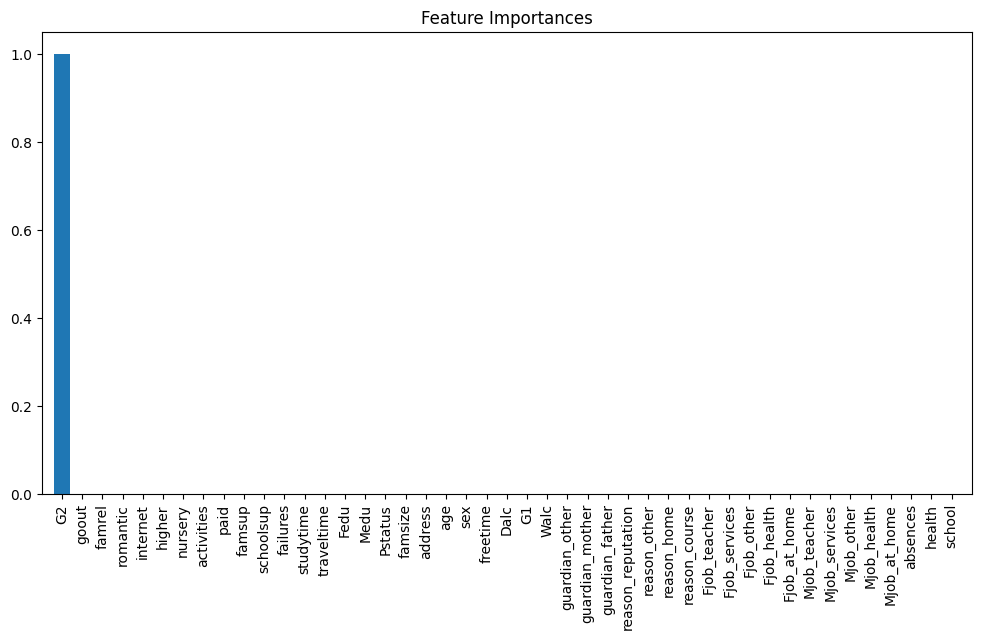

In [38]:
# 특성 중요도 확인
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도가 높은 특성 순으로 출력
for f in range(X_train.shape[1]):
    print(f'{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})')

# 그래프를 통해 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 3. 앙상블

### 3.1) 보팅 (주은)

#### 1) 환경적 요인 확인

In [36]:
# # 목표 변수 설정
# y = df['G_mean']
# X = df.drop(columns=['G_mean','G1', 'G2', 'G3'])

# # y 스케일링
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# y = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# # 데이터 분리 
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn.ensemble import VotingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

knn_reg = KNeighborsRegressor()
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(max_depth=3,min_samples_leaf=10, min_samples_split=10, random_state=0)
svr_reg = SVR()

voting_reg = VotingRegressor(
    estimators=[
        ('knn_clf', knn_reg),
        ('lin_clf', lin_reg),
        ('dt_clf', dt_reg),
        ('svr_reg', svr_reg)
    ]
)
# 훈련 
voting_reg.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = voting_reg.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = voting_reg.predict(X_train)
print('train')
model_score(y_train, y_pred)


# y_pred_train = voting_reg.predict(X_train)
# y_pred_test = voting_reg.predict(X_test)

# mse =  mean_squared_error(y_test, y_pred_test)
# rmse = root_mean_squared_error(y_test, y_pred_test)
# r2 = r2_score(y_test, y_pred_test)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

test
 mse : 0.76583 | r2 : 0.9096

train
 mse : 0.60524 | r2 : 0.94401


#### 2) G2를 빼고 이용

In [38]:
X = df.drop(columns=['G_mean', 'G3' , 'G2'])
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# 훈련 
voting_reg.fit(X_train, y_train)


y_pred_train = voting_reg.predict(X_train)
y_pred_test = voting_reg.predict(X_test)

mse =  mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 2.2767924858029702, RMSE: 1.5089043991595261, R2: 0.7640599363517212


### 3.2) 배깅 (도연)

In [40]:
from sklearn.ensemble import BaggingRegressor # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore


# 기본 모델로 의사결정나무 회귀 사용
base_regressor = DecisionTreeRegressor(random_state=42)

# BaggingRegressor로 앙상블 학습
model = BaggingRegressor()#base_estimator=base_regressor, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = model.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = model.predict(X_train)
print('train')
model_score(y_train, y_pred)




test
 mse : 0.72125 | r2 : 0.91486

train
 mse : 0.15179 | r2 : 0.98596


### 3.3) 부스팅 (예찬)

In [41]:
from xgboost import XGBRegressor


# 훈련 세트와 테스트 세트 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = model.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = model.predict(X_train)
print('train')
model_score(y_train, y_pred)

test
 mse : 0.82307 | r2 : 0.91457

train
 mse : 0.09057 | r2 : 0.99144


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# LightGBM 라이브러리 로드
from lightgbm import LGBMRegressor

# LightGBM 회귀 모델 학습
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_model.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = lgbm_model.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = lgbm_model.predict(X_train)
print('train')
model_score(y_train, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 285, number of used features: 40
[LightGBM] [Info] Start training from score 11.418596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
# Simple Gradient Boosting 모델 학습
sgb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42)
sgb_model.fit(X_train, y_train)


# 테스트 모델 점수
y_pred = sgb_model.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = sgb_model.predict(X_train)
print('train')
model_score(y_train, y_pred)

test
 mse : 0.72261 | r2 : 0.92499

train
 mse : 0.5189 | r2 : 0.95094


In [42]:
from sklearn.ensemble import HistGradientBoostingRegressor

# HistGradientBoosting 모델 학습
hgb_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hgb_model.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = hgb_model.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = hgb_model.predict(X_train)
print('train')
model_score(y_train, y_pred)

test
 mse : 0.98003 | r2 : 0.89827

train
 mse : 0.36363 | r2 : 0.96562


### 3.4) 랜덤포레스트 (도연)

In [44]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

# 학습
model.fit(X_train, y_train)

# 테스트 모델 점수
y_pred = model.predict(X_test)
print('test')
model_score(y_test, y_pred)
print()

# 학습용 모델 점수
y_pred = model.predict(X_train)
print('train')
model_score(y_train, y_pred)

# rf_clf.estimators_ : 100개의 DecisionTreeClassifier를 확인


# print(rf_clf.estimators_samples_)       # 100개의 DecisionTreeClassifier가 사용한 샘플 데이터 확인


# 특성 중요도 확인
fis = pd.Series(model.feature_importances_, index= X.columns).sort_values(ascending=False)
fis


test
 mse : 0.70669 | r2 : 0.92665

train
 mse : 0.17454 | r2 : 0.9835


G2                   0.938148
G1                   0.011262
absences             0.004924
Walc                 0.004658
goout                0.003899
age                  0.003035
famrel               0.002634
freetime             0.002333
health               0.002237
Medu                 0.002089
Fedu                 0.001697
traveltime           0.001410
studytime            0.001272
Dalc                 0.001152
failures             0.001117
reason_course        0.001035
Mjob_other           0.001002
Fjob_other           0.000992
guardian_father      0.000944
reason_reputation    0.000899
famsize              0.000810
nursery              0.000787
Mjob_services        0.000771
reason_home          0.000770
romantic             0.000748
sex                  0.000695
internet             0.000690
activities           0.000667
Fjob_services        0.000620
Mjob_health          0.000593
Fjob_health          0.000592
guardian_other       0.000569
schoolsup            0.000564
paid      

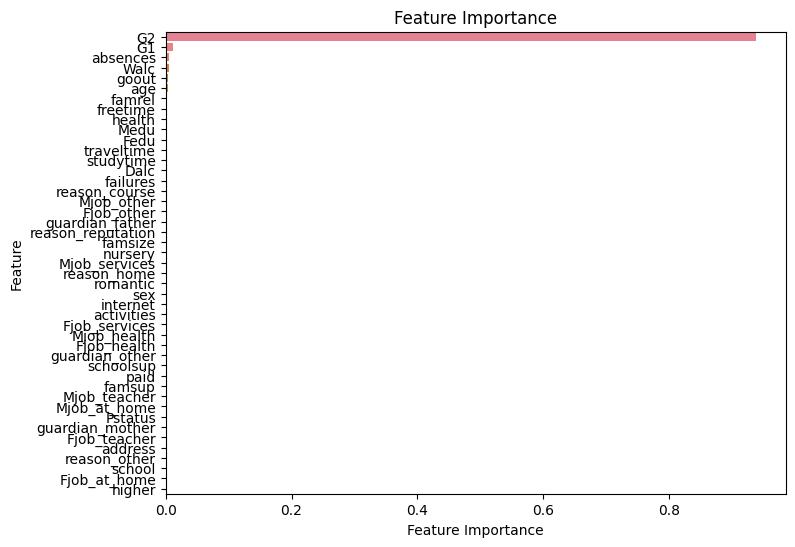

In [45]:
# 특성 중요도 시각화
plt.figure(figsize=(8,6))
sns.barplot(
    x=fis,
    y=fis.index,
    hue=fis.index
)

plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()